In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:

base_url = "https://matsda2sh.com/list/26/%D8%A7%D8%AC%D8%AA%D9%85%D8%A7%D8%B9%D9%8A?page={}"

# Function to extract links from a given page
def extract_links_from_page(url):
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")
    media_elements = soup.find_all("div", class_="media")
    links = []
    for media_element in media_elements:
        anchor_tags = media_element.find_all("a", href=True)
        for anchor_tag in anchor_tags:
            link = anchor_tag["href"]
            links.append(link)
    return links

# Function to scrape specified classes from a given link's page
def scrape_classes_from_link(url):
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")

    # Extract title
    title_element = soup.find("div", class_="det-m").find("h1")
    title = title_element.text.strip() if title_element else "Title not found"

    # Extract time
    time_element = soup.find("span", class_="date")
    time = time_element.text.strip() if time_element else ""

    # Extract category
    category_element = soup.find('span', style='color: #088B6B')
    category = category_element.text.strip() if category_element else ""

    # Scrape class="wekek blog-section references-section" and label as "fake"
    fake_elements = soup.find_all("div", class_="wekek blog-section references-section")
    fakes = [fake.text.strip() for fake in fake_elements]

    # Scrape class="wp-editor conclusion-ddd" and label as "true"
    true_elements = soup.find_all("div", class_="wp-editor conclusion-ddd")
    trues = [true.text.strip() for true in true_elements]

    return title, time, category, fakes, trues

# Get the number of pages (you can get this information programmatically or manually)
num_pages = 1

# Initialize an empty list to store dictionaries
data_list = []

# Scrape data from all pages and store in the list
for page_number in range(1, num_pages + 1):
    url = base_url.format(page_number)
    links_on_page = extract_links_from_page(url)
    for link in links_on_page:
        title, time, category, fakes, trues = scrape_classes_from_link(link)
        data = {
            "Title": title,
            "Time": time,
            "Category": category,
            "Link": link,
            "Fake News": fakes,
            "Fact News": trues
        }
        data_list.append(data)

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)




In [3]:
df

,Title,Time,Category,Link,Fake News,Fact News
0,"""مو سيلفا"" من هو المتهم بترويج أخبار كاذبة عن ...","Mar. 11, 2024",- اجتماعي,https://matsda2sh.com/details/13210/-%D9%85%D9...,[],[📌 بعد أيام من إعلان النيابة العامة التحقيق ف...
1,بعضها زاد بنسب تتجاوز 600%.. كيف ارتفعت رسوم ا...,"Mar. 05, 2024",- اجتماعي,https://matsda2sh.com/details/13202/%D8%A8%D8%...,[],[📌 وافق مجلس النواب يوم الأحد 25 فبراير 2024، ...
2,"عن السكر والدعم وتصنيف مصر في ""الأمن الغذائي""....","Feb. 21, 2024",- اجتماعي,https://matsda2sh.com/details/13184/%D8%B9%D9%...,"[الإدعاء\nخلال لقائه مع برنامج ""بالورقة والقلم...","[⭕️ الخطأ الأول: ""تصنيف مصر في مؤشر الأمن الغذ..."
3,حقيقة تصريحات حمدي رزق حول عدد اللاجئين في مصر,"Feb. 21, 2024",- اجتماعي,https://matsda2sh.com/details/13183/%D8%AD%D9%...,"[الإدعاء\n""لن نتحدث عن احتضان ما يربو على 9 مل...",[التصحيح: ⬇️⬇️\n\n◾ كلام حمدي رزق غير دقيق، حي...
4,"""البطالة"" في مصر | انخفاض ولكن.. ما تتجاهله ...","Feb. 18, 2024",- اجتماعي,https://matsda2sh.com/details/13175/-%D8%A7%D9...,[تحقيق متصدقش\n📌 يوم الخميس 15 فبراير 2024، أع...,[]
5,"""لا أملك المال لشراء الفوط الصحية"".. نساء يستخ...","Feb. 18, 2024",- اجتماعي,https://matsda2sh.com/details/13181/-%D9%84%D8...,[],[أدى ارتفاع #اسعار الفوط الصحية، التي تستخدمها...
6,حقيقة تصريحات فاروق جويدة عن نسبة الأمية في مصر,"Feb. 11, 2024",- اجتماعي,https://matsda2sh.com/details/13164/%D8%AD%D9%...,"[الإدعاء\n""فيه أكثر من ٣٠ مليونا ( في مصر) لا ...",[◾الكلام ده غير دقيق. ✅\n◾يبلغ عدد الأميين في ...
7,لأن التضخم والدولار يلتهمان كل شيء.. زيادة جد...,"Feb. 09, 2024",- اجتماعي,https://matsda2sh.com/details/13162/%D9%84%D8%...,[],"[📌 ""في أكبر حزمة اجتماعية عاجلة""، قرر الرئيس ع..."


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Function to extract links from a given page
def extract_links_from_page(url):
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")
    media_elements = soup.find_all("div", class_="media")
    links = []
    for media_element in media_elements:
        anchor_tags = media_element.find_all("a", href=True)
        for anchor_tag in anchor_tags:
            link = anchor_tag["href"]
            links.append(link)
    return links

# Function to scrape specified classes from a given link's page
def scrape_classes_from_link(url):
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, "html.parser")

    # Extract title
    title_element = soup.find("div", class_="det-m").find("h1")
    title = title_element.text.strip() if title_element else "Title not found"

    # Extract time
    time_element = soup.find("span", class_="date")
    time = time_element.text.strip() if time_element else ""

    # Extract category
    category_element = soup.find('span', style='color: #088B6B')
    category = category_element.text.strip() if category_element else ""

    # Scrape class="wekek blog-section references-section" and label as "fake"
    fake_elements = soup.find_all("div", class_="wekek blog-section references-section")
    fakes = [fake.text.strip() for fake in fake_elements]

    # Scrape class="wp-editor conclusion-ddd" and label as "true"
    true_elements = soup.find_all("div", class_="wp-editor conclusion-ddd")
    trues = [true.text.strip() for true in true_elements]

    return title, time, category, fakes, trues

# Define base URLs and number of pages for different categories
category_info = {
    "Social": ("https://matsda2sh.com/list/26/%D8%A7%D8%AC%D8%AA%D9%85%D8%A7%D8%B9%D9%8A?page={}", 51),
    "Sport": ("https://matsda2sh.com/list/146/%D8%B1%D9%8A%D8%A7%D8%B6%D8%A9?page={}", 52),
    "Economy": ("https://matsda2sh.com/list/166/%D8%A7%D9%82%D8%AA%D8%B5%D8%A7%D8%AF?page={}", 43),
    "Technology": ("https://matsda2sh.com/list/88/%D8%AA%D9%83%D9%86%D9%88%D9%84%D9%88%D8%AC%D9%8A%D8%A7?page={}", 6),
    "Politics": ("https://matsda2sh.com/list/46/%D8%B3%D9%8A%D8%A7%D8%B3%D9%8A?page={}", 95),
    "Science": ("https://matsda2sh.com/list/34/%D8%B9%D9%84%D9%88%D9%85?page={}", 14)
}

# Initialize an empty list to store dictionaries
data_list = []

# Scrape data from all pages and store in the list
for category, (base_url, num_pages) in category_info.items():
    for page_number in range(1, num_pages + 1):
        url = base_url.format(page_number)
        links_on_page = extract_links_from_page(url)
        for link in links_on_page:
            title, time, _, fakes, trues = scrape_classes_from_link(link)
            data = {
                "Title": title,
                "Time": time,
                "Category": category,
                 "Link": link,
                "Fake News": fakes,
                "Fact News": trues
            }
            data_list.append(data)

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_list)



                                                  Title           Time  \
0     "مو سيلفا" من هو المتهم بترويج أخبار كاذبة عن ...  Mar. 11, 2024   
1     بعضها زاد بنسب تتجاوز 600%.. كيف ارتفعت رسوم ا...  Mar. 05, 2024   
2     عن السكر والدعم وتصنيف مصر في "الأمن الغذائي"....  Feb. 21, 2024   
3        حقيقة تصريحات حمدي رزق حول عدد اللاجئين في مصر  Feb. 21, 2024   
4     "البطالة" في مصر |  انخفاض ولكن..  ما تتجاهله ...  Feb. 18, 2024   
...                                                 ...            ...   
2067  حقيقة العالم المصري محمد سند الذي اخترع هوائي ...  Sep. 20, 2018   
2068      حقيقة انتماء جماجم تابوت الاسكندرية لشخص واحد  Jul. 22, 2018   
2069                    بيض بلاستيك من الصين في الأسواق  Jul. 15, 2018   
2070             حقيقة اكتمال القمر قبل ميعاده في رمضان  May. 30, 2018   
2071                  ظهور أخطر حشرة في العالم بالمعادي  May. 22, 2018   

     Category                                               Link  \
0      Social  https://matsda2sh.com/detail

In [7]:
df

,Title,Time,Category,Link,Fake News,Fact News
0,"""مو سيلفا"" من هو المتهم بترويج أخبار كاذبة عن ...","Mar. 11, 2024",Social,https://matsda2sh.com/details/13210/-%D9%85%D9...,[],[📌 بعد أيام من إعلان النيابة العامة التحقيق ف...
1,بعضها زاد بنسب تتجاوز 600%.. كيف ارتفعت رسوم ا...,"Mar. 05, 2024",Social,https://matsda2sh.com/details/13202/%D8%A8%D8%...,[],[📌 وافق مجلس النواب يوم الأحد 25 فبراير 2024، ...
2,"عن السكر والدعم وتصنيف مصر في ""الأمن الغذائي""....","Feb. 21, 2024",Social,https://matsda2sh.com/details/13184/%D8%B9%D9%...,"[الإدعاء\nخلال لقائه مع برنامج ""بالورقة والقلم...","[⭕️ الخطأ الأول: ""تصنيف مصر في مؤشر الأمن الغذ..."
3,حقيقة تصريحات حمدي رزق حول عدد اللاجئين في مصر,"Feb. 21, 2024",Social,https://matsda2sh.com/details/13183/%D8%AD%D9%...,"[الإدعاء\n""لن نتحدث عن احتضان ما يربو على 9 مل...",[التصحيح: ⬇️⬇️\n\n◾ كلام حمدي رزق غير دقيق، حي...
4,"""البطالة"" في مصر | انخفاض ولكن.. ما تتجاهله ...","Feb. 18, 2024",Social,https://matsda2sh.com/details/13175/-%D8%A7%D9...,[تحقيق متصدقش\n📌 يوم الخميس 15 فبراير 2024، أع...,[]
...,...,...,...,...,...,...
2067,حقيقة العالم المصري محمد سند الذي اخترع هوائي ...,"Sep. 20, 2018",Science,https://matsda2sh.com/details/5870/%D8%AD%D9%8...,"[الإدعاء\n- صفحة اسمها ""إزعاج علمي"" ناشره فيدي...",[– الصفحة مشهورة بنشر فيديوهات تريقة على “المخ...
2068,حقيقة انتماء جماجم تابوت الاسكندرية لشخص واحد,"Jul. 22, 2018",Science,https://matsda2sh.com/details/8871/%D8%AD%D9%8...,[الإدعاء\n- خبر منتشر بشكل كبير جدًا منسوب لجر...,[– الكلام ده مش حقيقي، محدش من وزارة الآثار قا...
2069,بيض بلاستيك من الصين في الأسواق,"Jul. 15, 2018",Science,https://matsda2sh.com/details/8940/%D8%A8%D9%8...,[],[جالنا أسئلة كتير جدًا عن موضوع “البيض البلاست...
2070,حقيقة اكتمال القمر قبل ميعاده في رمضان,"May. 30, 2018",Science,https://matsda2sh.com/details/8767/%D8%AD%D9%8...,[الإدعاء\n- في الساعات اللى فاتت بعض الناس نشر...,[– مركز الفلك الدولي قال إنه لا يمكن الاعتماد ...


In [8]:
summary_stats = df.describe()
summary_stats


,Title,Time,Category,Link,Fake News,Fact News
count,2072,2072,2072,2072,2072,2072
unique,1968,1030,6,1987,1821,1936
top,حقيقة تصريح د/ مصطفى بدرة عن تكلفة إقامة المها...,"May. 19, 2021",Politics,https://matsda2sh.com/details/10067/%D8%AD%D9%...,[],[]
freq,3,22,760,3,166,41


In [9]:
category_counts = df['Category'].value_counts()
category_counts

Category
Politics      760
Sport         411
Social        408
Economy       344
Science       108
Technology     41
Name: count, dtype: int64

In [10]:
dff = df[(df['Fake News'] != 'not found') & (df['Fact News'] != 'not found') & (df['Fake News'] != '') & (df['Fact News'] != '')]

In [17]:
summary_stats = dff.describe()
summary_stats



,Title,Time,Category,Link,Fake News,Fact News
count,1968,1968,1968,1968,1968,1968
unique,1968,1027,6,1968,1806,1922
top,"""مو سيلفا"" من هو المتهم بترويج أخبار كاذبة عن ...","May. 19, 2021",Politics,https://matsda2sh.com/details/13210/-%D9%85%D9...,[],[]
freq,1,22,700,1,150,38


In [18]:
category_counts = dff['Category'].value_counts()
print(category_counts)

Category
Politics      700
Social        405
Sport         404
Economy       321
Science        99
Technology     39
Name: count, dtype: int64


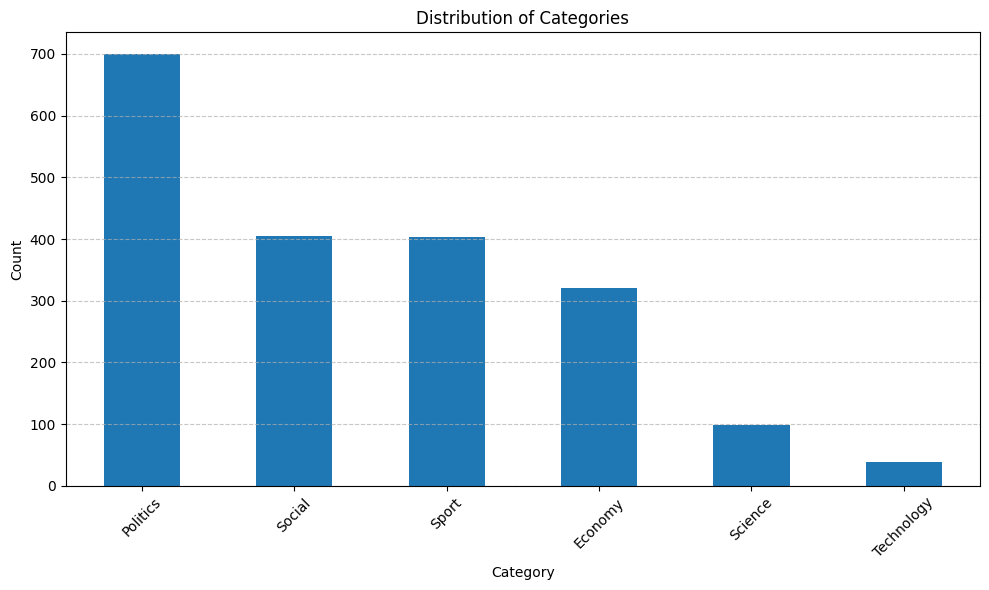

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named dff
category_counts = dff['Category'].value_counts()

# Plotting the graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()






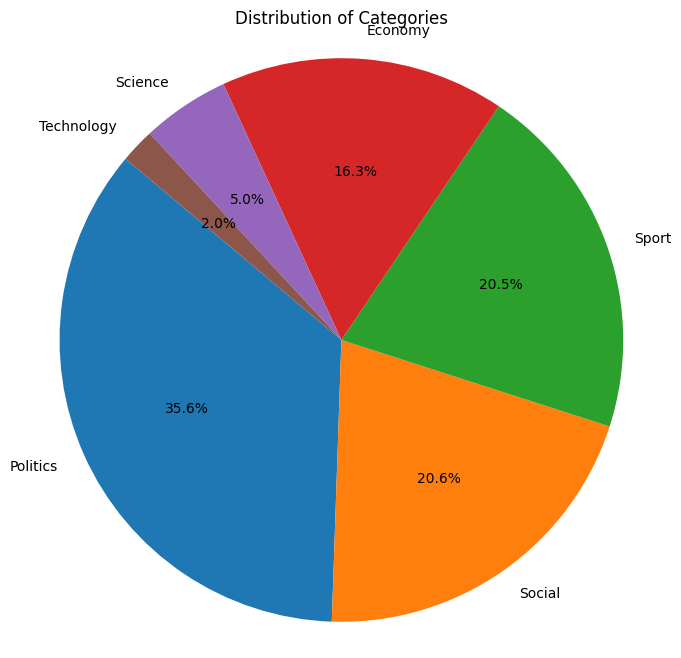

In [22]:
# Assuming your DataFrame is named dff
category_counts = dff['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [23]:
# save into a CSV file
dff.to_csv("Matsd24_news.csv", index=False)

print("Dataset created and saved as 'fake_news_dataset_socio.csv'.")

Dataset created and saved as 'fake_news_dataset_socio.csv'.
